# Project 1

In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#acquire the dataset
df = pd.read_csv("student_info.csv")
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [3]:
df.shape

(200, 2)

In [4]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


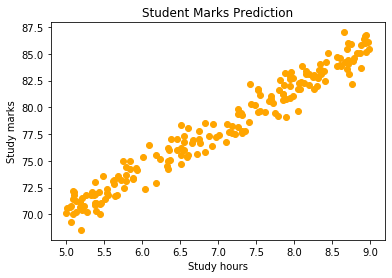

In [5]:
plt.scatter(x = df.study_hours, y = df.student_marks, color='orange')
plt.xlabel('Study hours')
plt.ylabel('Study marks')
plt.title('Student Marks Prediction')
plt.show()

In [6]:
#this is a problem of linear regression as noticed by the scatter graph
#now we have to perform data-preprocessing
#DataCleaning
#find the number of null values
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [7]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [8]:
#fillna is a substitute for SimpleImputer
#fillna is a function which fills the missing places with values
#here our stratergy is to fill mean in those locations
df1 = df.fillna(df.mean())
df1

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
...,...,...
195,7.530000,81.67
196,8.560000,84.68
197,8.940000,86.75
198,6.600000,78.05


In [9]:
#now this new dataset has no missing values
df1.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [10]:
#getting the independent and dependent variable
#split the dataset
d1 = df1.drop("student_marks",axis="columns")
#drop function will remove the student marks column from the datatset
d2 = df1.drop("study_hours",axis="columns")
#drop is a substitute
#iloc is a better option though

In [11]:
d1.shape

(200, 1)

In [12]:
d2.shape

(200, 1)

In [13]:
#train and test split
from sklearn.model_selection import train_test_split
d1_train,d1_test,d2_train,d2_test = train_test_split(d1,d2,test_size=0.2,random_state=0)

In [14]:
#select a model and train it
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(d1_train,d2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#calculating the value of slope
lr.coef_[0][0].round(2)
#value of lr.coef is a 2-D array and hence we used [0][0]

3.93

In [16]:
#calculating the value of intercept
lr.intercept_[0].round(2)

50.45

In [17]:
#now we are going to predict the marks of a students who studies for x=4 hours
#this is manual testing
m = 3.93
c = 50.45
y = m*4 + c
y

66.17

In [18]:
#prediction 
lr.predict([[4]])[0][0].round(2)
#manual and value from our model is the same

66.17

In [19]:
d2_pred = lr.predict(d1_test)

In [20]:
#now we are going to do a comparitive study by creating a dataframe
pd.DataFrame(np.c_[d1_test,d2_test,d2_pred],columns=["Study Hours","Original Marks","Predicted Marks"])

,Study Hours,Original Marks,Predicted Marks
0,8.410000,82.50,83.505073
1,5.190000,71.18,70.849272
2,5.720000,73.25,72.932370
3,8.880000,83.64,85.352348
4,5.790000,73.64,73.207496
5,8.660000,86.99,84.487666
6,7.550000,81.18,80.124952
7,7.990000,82.75,81.854316
8,7.750000,79.50,80.911027
9,8.080000,81.70,82.208050


In [21]:
#calculate the accuracy
lr.score(d1_test,d2_test)

0.9521841793508594

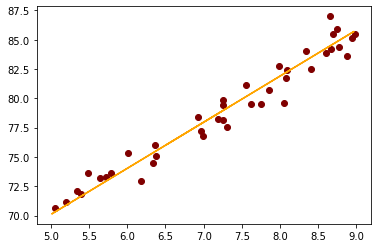

In [22]:
#now we will do a graph plot
#visualization
plt.scatter(d1_test,d2_test,color='maroon')
plt.plot(d1_train,lr.predict(d1_train),color='orange')

In [23]:
#now we present our solution
#creating a .pkl file
import joblib 
joblib.dump(lr,'Student_Marks_Prediction.pkl')

['Student_Marks_Prediction.pkl']